In [2]:
import sys
sys.path.append("../../")
DATA_PATH = "../../data/"
SAVE_PATH = "../../plots"

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import py_common.utility as utility
from py_common.units import *
from py_common.scattering_dependence import *
from py_common.bounds_dependence import *
from py_common.wave_function import *
from matplotlib.collections import LineCollection
import itertools

# plt.rcParams.update({'font.size': 18})

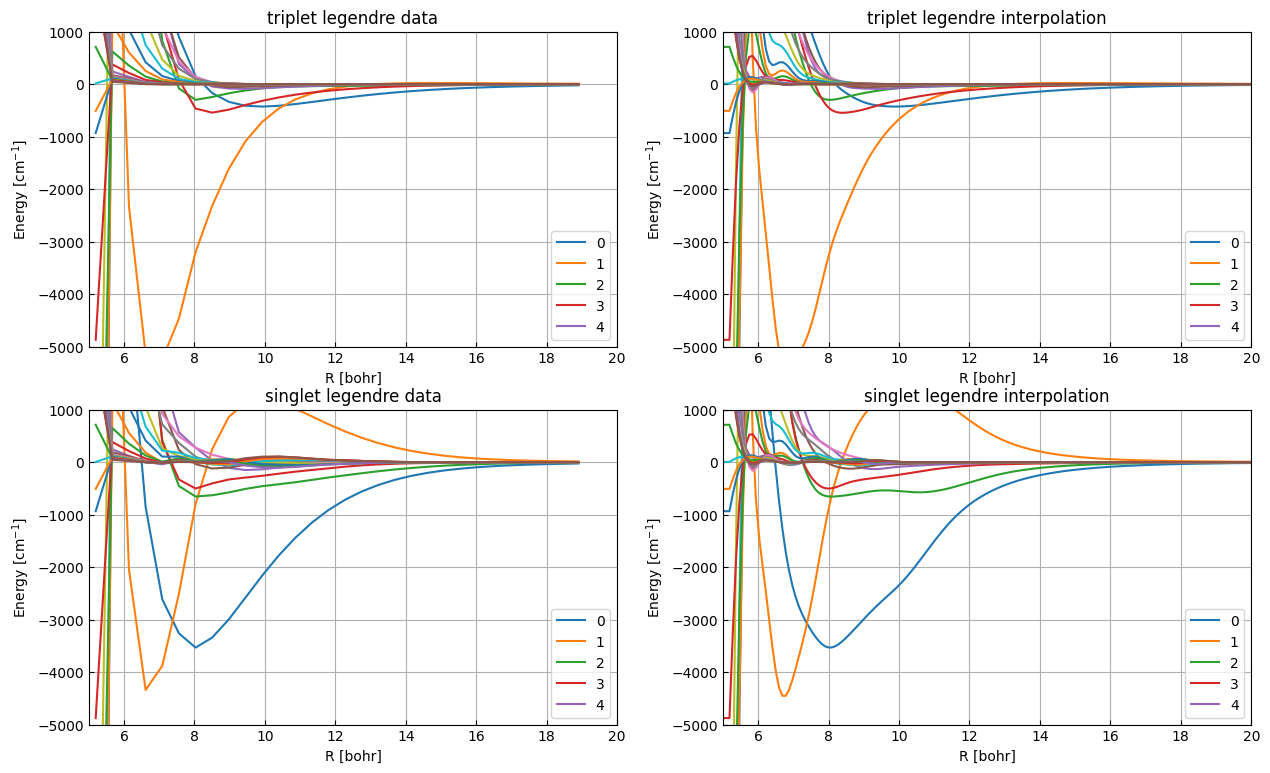

In [13]:
files = [
    "SrF_Rb_triplet_dec.dat",
    "SrF_Rb_triplet_dec_interpolated.dat",
    "SrF_Rb_singlet_dec.dat",
    "SrF_Rb_singlet_dec_interpolated.dat"
]

titles = [
    "triplet legendre data",
    "triplet legendre interpolation",
    "singlet legendre data",
    "singlet legendre interpolation"
]

fig, axes = utility.plot_many(2, 2, (15, 9))

for i, ax in enumerate(axes):
    data = utility.load(f"{DATA_PATH}/{files[i]}")
    scalings = data[:, 0]
    values_legendre = data[:, 1:]

    ax.plot(scalings, values_legendre / CMINV)
    ax.legend([str(i) for i in range(5)])
    ax.set_title(titles[i])
    ax.set_xlabel("R [bohr]")
    ax.set_ylabel(r"Energy [cm$^{-1}$]")

    ax.set_xlim(5, 20)
    ax.set_ylim(-5000, 1000)
    

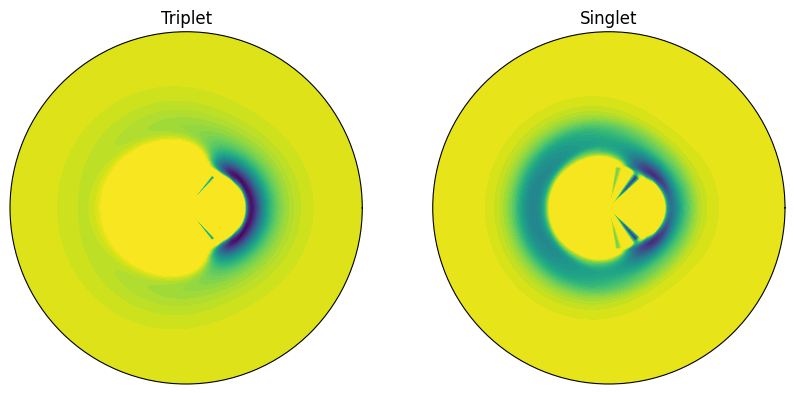

In [21]:
triplet = utility.load(f"{DATA_PATH}/SrF_Rb_triplet_dec_interpolated.dat")
triplet[:, 1:] /= CMINV
singlet = utility.load(f"{DATA_PATH}/SrF_Rb_singlet_dec_interpolated.dat")
singlet[:, 1:] /= CMINV

l_max = 10
r = triplet[:200, 0]
polar = np.linspace(-np.pi, np.pi, 100)

triplet_mesh = np.zeros((len(r), len(polar)))
for i in range(len(r)):
    triplet_mesh[i, :] = np.polynomial.legendre.legval(np.cos(polar), triplet[i, 1:(l_max + 2)])

singlet_mesh = np.zeros((len(r), len(polar)))
for i in range(len(r)):
    singlet_mesh[i, :] = np.polynomial.legendre.legval(np.cos(polar), singlet[i, 1:(l_max + 2)])

# add (0, 0)
max_val = 100
r = np.concatenate(([0], r))
polar = np.concatenate(([0], polar))
triplet_mesh = np.concatenate((triplet_mesh[:, 0:1], triplet_mesh), axis=1)
triplet_mesh = np.concatenate((max_val * np.ones_like(triplet_mesh[0:1, :]), triplet_mesh), axis=0)
singlet_mesh = np.concatenate((singlet_mesh[:, 0:1], singlet_mesh), axis=1)
singlet_mesh = np.concatenate((max_val * np.ones_like(singlet_mesh[0:1, :]), singlet_mesh), axis=0)


triplet_mesh = np.clip(triplet_mesh, -10000, max_val)
singlet_mesh = np.clip(singlet_mesh, -10000, max_val)

fig, axes = plt.subplots(1, 2, subplot_kw=dict(projection='polar'), figsize = (10, 5))
CS = axes[0].contourf(polar, r, triplet_mesh, levels=50)

axes[0].set_title("Triplet")
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].grid(False)

axes[1].set_title("Singlet")
CS = axes[1].contourf(polar, r, singlet_mesh, levels=50)
axes[1].set_xticklabels([])
axes[1].set_yticklabels([])
axes[1].grid(False)


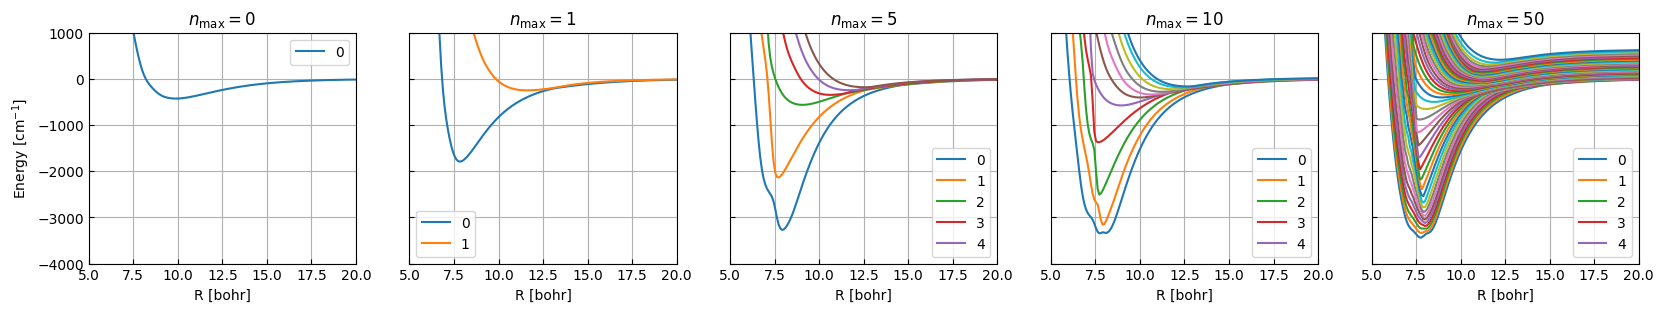

In [7]:
n_maxes = [0, 1, 5, 10, 50]

fig, axes = utility.plot_many(1, 5, (20, 3), sharey=True)

for i, ax in enumerate(axes):
    data = utility.load(f"{DATA_PATH}/SrF_Rb_triplet_adiabat_n_{n_maxes[i]}.dat")
    scalings = data[:, 0]
    values_legendre = data[:, 1:]

    ax.plot(scalings, values_legendre / CMINV)
    ax.legend([str(i) for i in range(5)])
    ax.set_title(r"$n_\text{max}" + f" = {n_maxes[i]}$")
    ax.set_xlabel("R [bohr]")

    ax.set_xlim(5, 20)
    ax.set_ylim(-4000, 1000)
axes[0].set_ylabel(r"Energy [cm$^{-1}$]");

# fig.savefig(f"{SAVE_PATH}/srf_rb_adiabats_triplet.pdf", bbox_inches = "tight")

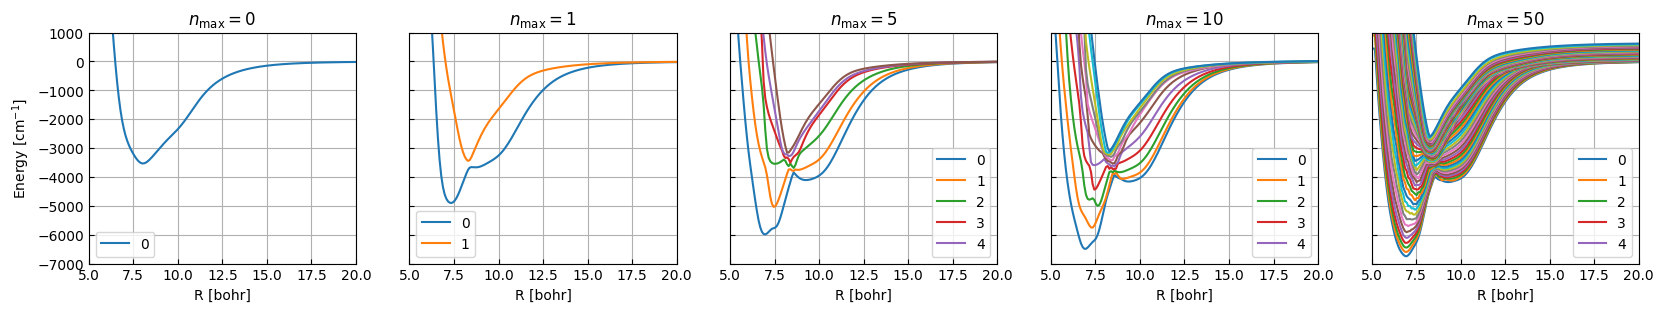

In [8]:
n_maxes = [0, 1, 5, 10, 50]

fig, axes = utility.plot_many(1, 5, (20, 3), sharey=True)

for i, ax in enumerate(axes):
    data = utility.load(f"{DATA_PATH}/SrF_Rb_singlet_adiabat_n_{n_maxes[i]}.dat")
    scalings = data[:, 0]
    values_legendre = data[:, 1:]

    ax.plot(scalings, values_legendre / CMINV)
    ax.legend([str(i) for i in range(5)])
    ax.set_title(r"$n_\text{max}" + f" = {n_maxes[i]}$")
    ax.set_xlabel("R [bohr]")

    ax.set_xlim(5, 20)
    ax.set_ylim(-7000, 1000)
axes[0].set_ylabel(r"Energy [cm$^{-1}$]");
    
# fig.savefig(f"{SAVE_PATH}/srf_rb_adiabats_singlet.pdf", bbox_inches = "tight")

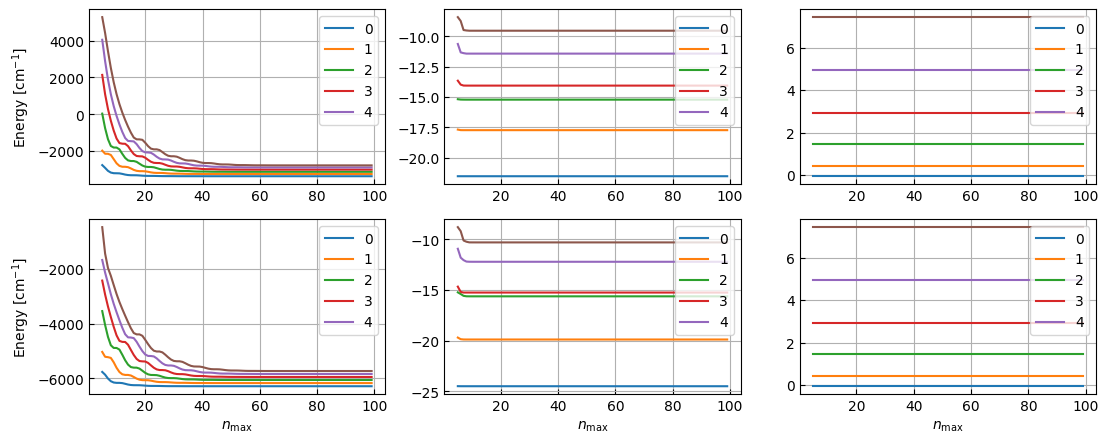

In [37]:
fig, axes = utility.plot_many(2, 3, (13, 5))

files = [
    "SrF_Rb_triplet_adiabat_levels_r_7",
    "SrF_Rb_triplet_adiabat_levels_r_20",
    "SrF_Rb_triplet_adiabat_levels_r_50",
    "SrF_Rb_singlet_adiabat_levels_r_7",
    "SrF_Rb_singlet_adiabat_levels_r_20",
    "SrF_Rb_singlet_adiabat_levels_r_50",
]

for i, ax in enumerate(axes):
    data = utility.load(f"{DATA_PATH}/{files[i]}.dat")
    scalings = data[:, 0]
    values_legendre = data[:, 1:]

    ax.plot(scalings, values_legendre / CMINV)
    ax.legend([str(i) for i in range(5)], loc = "upper right")

axes[1, 0].set_xlabel(r"$n_\text{max}$")
axes[1, 1].set_xlabel(r"$n_\text{max}$")
axes[1, 2].set_xlabel(r"$n_\text{max}$")

axes[0, 0].set_ylabel(r"Energy [cm$^{-1}$]")
axes[1, 0].set_ylabel(r"Energy [cm$^{-1}$]");
    
# fig.savefig(f"{SAVE_PATH}/srf_rb_adiabats_singlet.pdf", bbox_inches = "tight")

# Scaled potentials

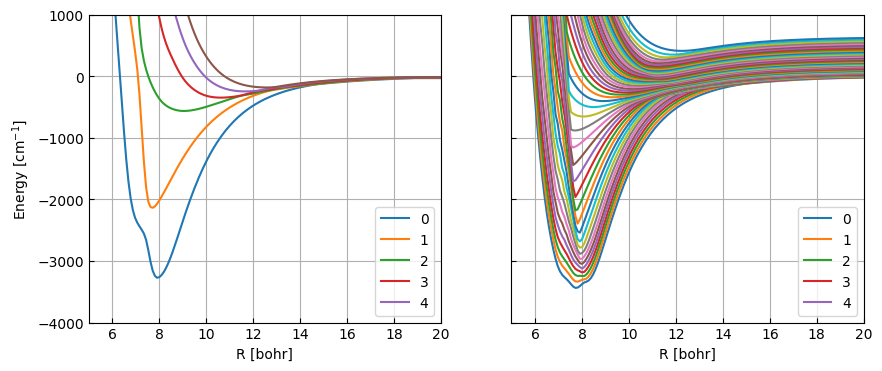

In [13]:
fig, axes = utility.plot_many(1, 2, shape = (10, 4), sharey=True)

files = [
    f"{DATA_PATH}/SrF_Rb_triplet_adiabat_scaled.dat",
    f"{DATA_PATH}/SrF_Rb_triplet_adiabat_n_50.dat"
]

for ax, file in zip(axes, files):
    data = utility.load(file)
    scalings = data[:, 0]
    values_legendre = data[:, 1:]

    ax.plot(scalings, values_legendre / CMINV)
    ax.legend([str(i) for i in range(5)])
    ax.set_xlabel("R [bohr]")

    ax.set_xlim(5, 20)
    ax.set_ylim(-4000, 1000)
axes[0].set_ylabel(r"Energy [cm$^{-1}$]");

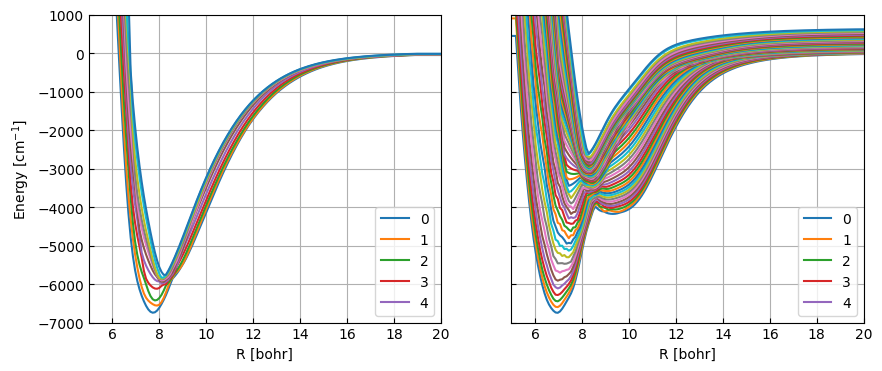

In [11]:
fig, axes = utility.plot_many(1, 2, shape = (10, 4), sharey = True)

files = [
    f"{DATA_PATH}/SrF_Rb_singlet_adiabat_scaled.dat",
    f"{DATA_PATH}/SrF_Rb_singlet_adiabat_n_50.dat"
]

for ax, file in zip(axes, files):
    data = utility.load(file)
    scalings = data[:, 0]
    values_legendre = data[:, 1:]

    ax.plot(scalings, values_legendre / CMINV)
    ax.legend([str(i) for i in range(5)])
    ax.set_xlabel("R [bohr]")

    ax.set_xlim(5, 20)
    ax.set_ylim(-7000, 1000)
axes[0].set_ylabel(r"Energy [cm$^{-1}$]");

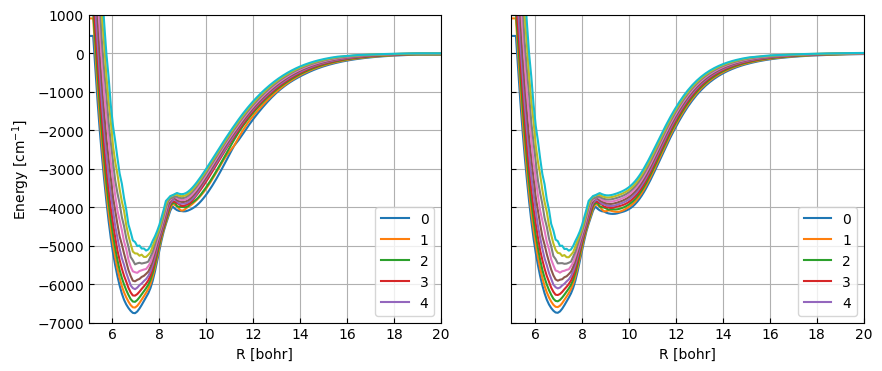

In [12]:
fig, axes = utility.plot_many(1, 2, shape = (10, 4), sharey=True)

files = [
    f"{DATA_PATH}/SrF_Rb_singlet_adiabat_50_cut_10.dat",
    f"{DATA_PATH}/SrF_Rb_singlet_adiabat_n_50.dat"
]

for ax, file in zip(axes, files):
    data = utility.load(file)
    scalings = data[:, 0]
    values_legendre = data[:, 1:11]

    ax.plot(scalings, values_legendre / CMINV)
    ax.legend([str(i) for i in range(5)])
    ax.set_xlabel("R [bohr]")

    ax.set_xlim(5, 20)
    ax.set_ylim(-7000, 1000)
axes[0].set_ylabel(r"Energy [cm$^{-1}$]");